# Analyzing Bank Customer Data for Better Term Deposit Campaigns
Getting to Know Our Customers: Insights for Better Campaigns Marketing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/mewii/Desktop/Data Course/Bank Target Marketing Project/cleaned_data.csv')

## 4. Analyze

In the analyze phase of our project, we dive deep down into our dataset to uncover the underlying relationships, trends, and patterns that are essential to addressing our business problem.

Our analysis is divided into two parts: *Customers base overview* and *Subscribers analysis*

### Part 1: Customers Base Overview
In this section, we examine the comprehensive demographics, financial behaviors, and characteristics of our entire customer base. This analysis provides foundational insights into the varied aspects of our customers base profiles.

- **Demographic Analysis:** Assessed age distribution, education levels, and job categories.
- **Financial Behavior:** Analyzed account balances and loan statuses.
- **Cross-Analysis:** Investigated how demographic and financial data interact.

#### 1. Demographics Profiles

##### 1.1 Age Distributions

In [17]:
# Descriptive Statistics
df[['age']].describe()

,age
count,45210.000000
mean,40.936231
std,10.618879
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


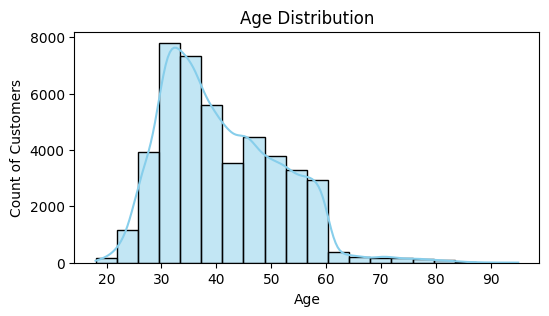

In [18]:
# Plot histogram of 'age'
fig, ax = plt.subplots(figsize=(6, 3))
sns.histplot(data=df['age'], kde=True, color='skyblue', bins=20, ax=ax)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Customers')
plt.show()

The distribution displays a concentration primarily in middle-age (30 to 50 years of age), aligning with the workforce's most active segment. The average age of our customer base is approximately 41 years, indicating a mature profile likely to engage in financial planning and savings.

##### 1.2 Education, Marital Status, and Job Category Distributions

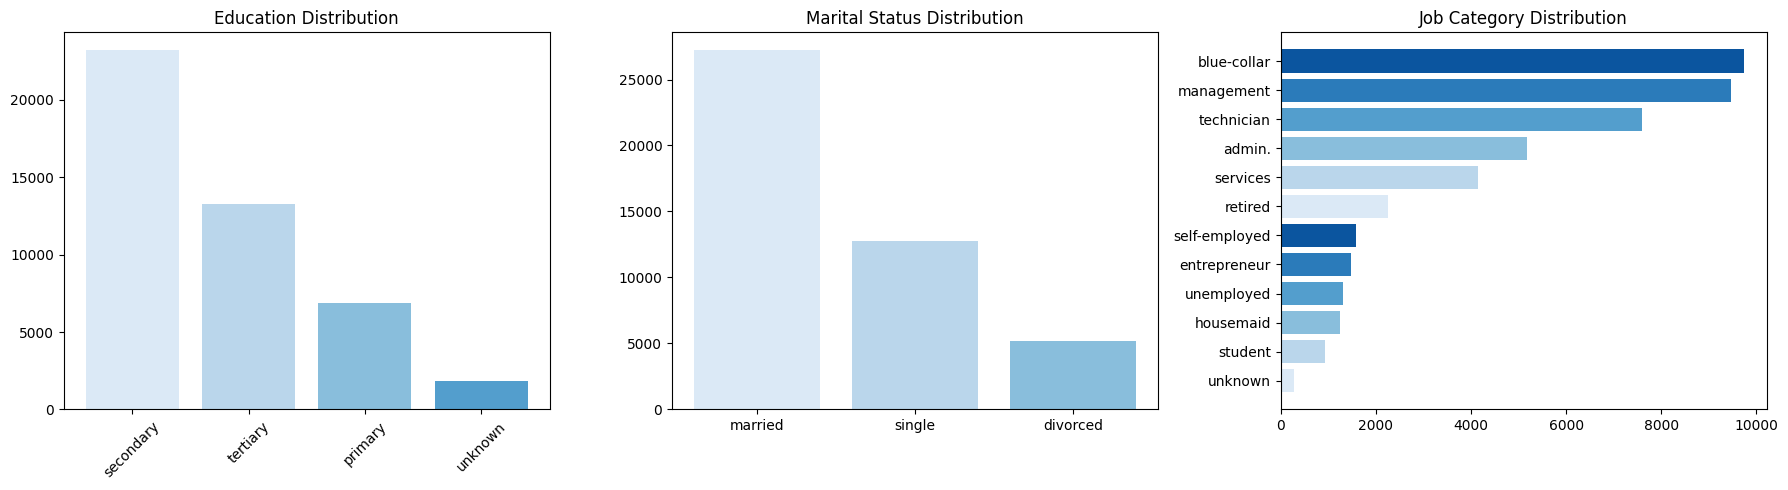

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

palette = sns.color_palette('Blues')

education_counts = df['education'].value_counts().sort_values(ascending=False)
axes[0].bar(education_counts.index, education_counts.values, color=palette[:len(education_counts)])
axes[0].set_title('Education Distribution')
axes[0].tick_params(axis='x', rotation=45)

marital_counts = df['marital'].value_counts().sort_values(ascending=False)
axes[1].bar(marital_counts.index, marital_counts.values, color=palette[:len(marital_counts)])
axes[1].set_title('Marital Status Distribution')

job_counts = df['job'].value_counts().sort_values(ascending=True)
axes[2].barh(job_counts.index, job_counts.values, color=palette[:len(job_counts)])
axes[2].set_title('Job Category Distribution')

plt.tight_layout()
plt.show()

Education Distribution: Most customers have completed secondary education, followed by those with tertiary education. A smaller segment has primary education only, with a minimal count in the 'unknown' category.

Marital Status Distribution: Most customers are married, which might be linked to having steady finances and possibly more interest in term deposits. Customers who are single or divorced are also notable groups and they might need different kinds of banking services.

Job Category Distribution: The distribution across job categories shows a diverse workforce with a notable number of customers in blue-collar jobs,management jobs,  and technical positions. These roles reflect a range of income levels and financial priorities, influencing their banking and investment choices.

#### 2. Financial Behaviors

##### 2.1 Account Balances

In [63]:
# Account balance statistics
df[['balance']].describe()

,balance
count,45210.000000
mean,1362.290179
std,3044.797065
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


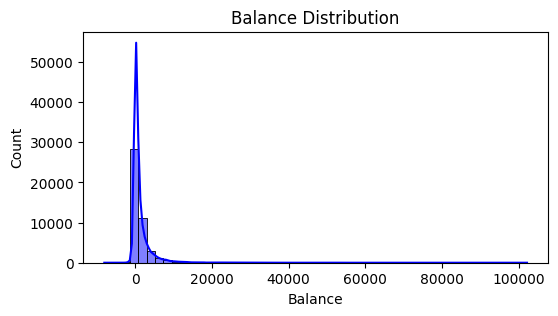

In [64]:
# Plot histogram of 'balance'
fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(df['balance'], kde=True, color='Blue', bins=50)
ax.set_title('Balance Distribution')
ax.set_xlabel('Balance')
ax.set_ylabel('Count')

plt.show()

The majority of customers maintain modest account balances, with a mean balance of around $1,362. Notably, a few customers possess significantly higher balances, which suggests the presence of high net-worth individuals within the same customer base. The wide spread in balances, indicated by a standard deviation of approximately $3,045, points to a diverse financial background among customers.

There are some customers with negative balances. These might indicate overdrafts or loans exceeding account holdings.

##### 2.2 Loan Status

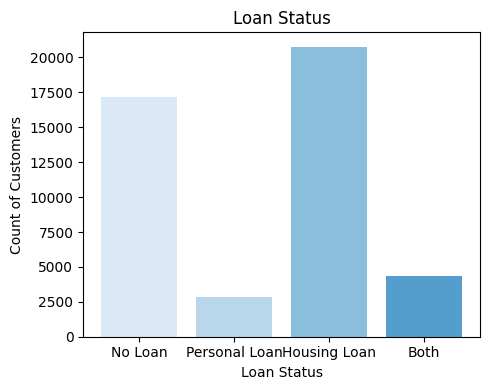

In [65]:
palette = sns.color_palette('Blues')

def determine_loan_category(row):
    if row['loan'] == 'no' and row['housing'] == 'no':
        return 'No Loan'
    elif row['loan'] == 'yes' and row['housing'] == 'no':
        return 'Personal Loan'
    elif row['loan'] == 'no' and row['housing'] == 'yes':
        return 'Housing Loan'
    elif row['loan'] == 'yes' and row['housing'] == 'yes':
        return 'Both'

df['combined_loan_status'] = df.apply(determine_loan_category, axis=1)

fig, ax = plt.subplots(figsize=(5, 4))

combined_loan_status_counts = df['combined_loan_status'].value_counts(normalize=False)[['No Loan', 'Personal Loan', 'Housing Loan', 'Both']]

bars = ax.bar(combined_loan_status_counts.index, combined_loan_status_counts.values, color= palette)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count of Customers')

plt.tight_layout()
plt.show()

- A significant number of customers do not have any loans, which could indicate a potential for savings or investment products like term deposits.
- Customers with housing loans are the next largest group, which may suggest financial awareness and stability, possibly making them good candidates for term deposits as well.
- Those with personal loans represent a smaller segment, suggesting they might have other financial priorities or commitments.
- Customers with both types of loans are the smallest group.

##### 2.3 Credit History

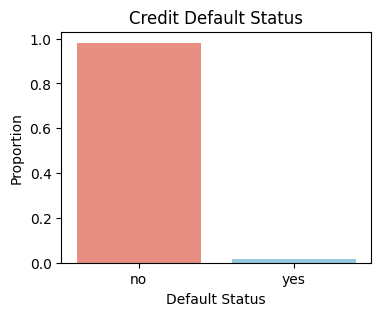

In [66]:
colors = {'yes': 'skyblue', 'no': 'salmon'}

# Calculate proportions
default_status_counts = df['default'].value_counts(normalize=True).reset_index()
default_status_counts.columns = ['Default Status', 'Proportion']

# Create the plot
fig, ax = plt.subplots(figsize=(4, 3))

sns.barplot(x='Default Status', y='Proportion',hue='Default Status',legend=False, data=default_status_counts,palette=colors, ax=ax)

plt.title('Credit Default Status')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.show()

The majority of customers do not have a credit default. Because of this overwhelming proportion for "no," this could mean that credit default status might not be a significant differentiator for subscription rates within this dataset.

#### 3. Cross-Analysis

##### 3.1 The Impact of Age on Average Balance

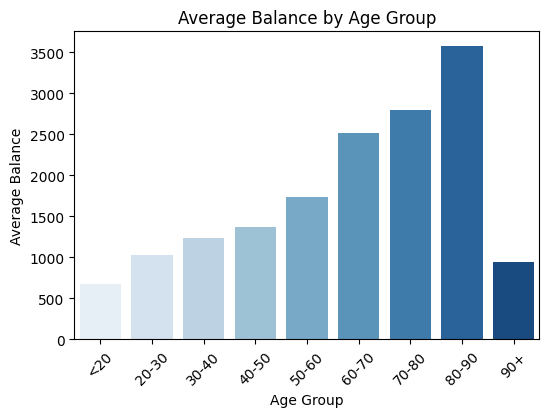

In [67]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

pivot_balance_age = df.pivot_table(values='balance', index='age_group',observed=False, aggfunc='mean')

pivot_balance_age.reset_index(inplace=True)

plt.figure(figsize=(6, 4))
sns.barplot(data=pivot_balance_age, x='age_group',legend=False, hue='age_group', y='balance', palette='Blues')
plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()


- Average bank balances increase with age, peaking in the 70-80 age bracket.
- There's a sharp decline in average balances for customers over 90, likely due to retirement expenses or wealth transfers.
- Financial products can be tailored to different age groups based on their balance trends.

##### 3.2 The Impact of Marital Status and Education on Average Balance

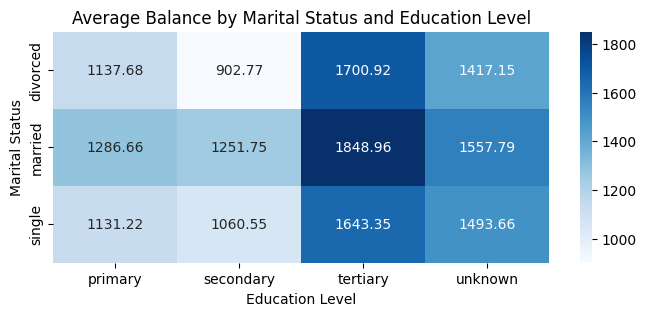

In [68]:
pivot_table = df.pivot_table(values='balance', index='marital', columns='education', aggfunc='mean')
fig, axes = plt.subplots(figsize=(8, 3))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f") 
plt.title('Average Balance by Marital Status and Education Level')
plt.ylabel('Marital Status')
plt.xlabel('Education Level')
plt.show()

- Higher education correlates with increased average bank balances, particularly noticeable among married individuals.
- Married customers tend to have higher balances across all education levels, suggesting potential financial stability associated with marriage.
- Individuals with unspecified education level have higher balances, indicating that factors beyond education could be contributing to financial standing.

### Demorgraphic Insights:

- Age Distribution: The customer base is concentrated primarily in the middle-age bracket (30 to 50 years), with an average age of approximately 41 years. This suggests that the bank's customers are predominantly in their prime earning years, which is ideal for financial products that require a stable income.

- Education Levels: Most customers have completed secondary education, followed by tertiary education. This indicates a relatively well-educated customer base, which may have more sophisticated financial needs and a better understanding of investment products like term deposits.

- Marital Status: The majority of customers are married, suggesting financial stability and potential interest in joint financial planning and savings products. Single and divorced individuals also represent significant segments that might require tailored financial services.

- Job Categories: The workforce is diverse, with significant numbers in blue-collar, management, and technical jobs. This diversity suggests varied financial priorities and needs that could be addressed through segmented marketing strategies.
- Financial Behaviors:
   -  Account Balances: The mean balance is relatively modest, but the standard deviation is high, indicating significant variability in the financial holdings among customers. This variability suggests the potential for both mass-market and premium financial products.
   - Loan Status: A substantial portion of the customer base does not have loans, indicating potential disposable income for investments like term deposits. Those with housing loans may also be good targets for term deposits as they demonstrate financial planning behavior.
   - Credit History: The overwhelming majority of customers do not have a credit default, indicating a financially responsible customer base which is favorable for new financial product offerings.

Insights:
- Age Profile: The customer base is concentrated primarily in the 30 to 50 age range, suggesting a maturity that aligns well with products aimed at established earners.

- Educational Background: A majority of customers have at least a secondary education, indicating a generally well-educated base that may appreciate more sophisticated banking products and services.

- Marital Status: With most customers being married, financial products that support joint financial planning could be particularly appealing.
- Job: The varied job sectors represented within the customer base highlight the need for a range of financial products tailored to different professional financial needs and priorities.

- Financial Behaviors:
Account Balances: The average account balance is modest but varies widely, suggesting a diverse financial capability across the customer base.
Loan Status: The prevalence of customers without loans suggests potential for savings and investment products, whereas those with loans may need products that consider their existing financial commitments.
Credit History: The predominance of customers without credit defaults indicates a customer base with good financial standing.